In [1]:
import matplotlib.pyplot as plt

from csvreader import read_patient_csv
from comparison import compare_models

In [2]:
patientSet = read_patient_csv()
Adults = []
for patient in patientSet:
    if patient["age"] > 17:
        Adults.append(patient)

In [3]:
results = compare_models(Adults, "Marsh")

In [4]:
print(results["patient_level"][0])

{'patient': '1', 'results': {'MDPE': 0.8454222680966839, 'MDAPE': 0.8454222680966839, 'Wobble': 0.17816757300569736, 'Divergence': 0.3610438346285815}}


In [5]:
patient_IDs = [d["patient"] for d in results["patient_level"]]
print(patient_IDs)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '

In [6]:
from sklearn.utils import resample

resampled = resample(patient_IDs, n_samples=len(patient_IDs))
print(len(resampled))

523


In [7]:
sampled_median = [m["results"]["MDAPE"] for m in results["patient_level"] if m["patient"] in resampled]
print(len(sampled_median))

335


In [8]:
unsampled_median = [m["results"]["MDAPE"] for m in results["patient_level"]]

sampled_median = []

for i in resampled:
    j = [m["results"]["MDAPE"] for m in results["patient_level"] if m["patient"] == i]
    sampled_median.append(j)

In [9]:
import statistics

print(statistics.median(unsampled_median))
print(statistics.median(sampled_median)[0])

0.34693299752056883
0.325485604146737


In [10]:
%%timeit

resampled = resample(patient_IDs, n_samples=len(patient_IDs))


272 µs ± 56.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%%timeit

for i in resampled:
        j = [m["results"]["MDAPE"] for m in results["patient_level"] if m["patient"] == i]

63.3 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
medians = []

for x in range (1000):
    resampled = resample(patient_IDs, n_samples=len(patient_IDs), random_state=x)
    sampled_median = [m["results"]["MDAPE"] for m in results["patient_level"] if m["patient"] in resampled]
        
    medians.append(statistics.median(sampled_median))

sampled_median = [m["results"]["MDAPE"] for m in results["patient_level"] if m["patient"] in resampled]

print(statistics.median(medians))

0.34693299752056883


(array([  5.,  26.,  20.,  23.,  63., 149., 187., 131., 156., 119.,  28.,
         31.,  45.,   4.,   4.,   5.,   1.,   0.,   1.,   2.]),
 array([0.31810962, 0.32218916, 0.3262687 , 0.33034824, 0.33442778,
        0.33850733, 0.34258687, 0.34666641, 0.35074595, 0.35482549,
        0.35890503, 0.36298458, 0.36706412, 0.37114366, 0.3752232 ,
        0.37930274, 0.38338229, 0.38746183, 0.39154137, 0.39562091,
        0.39970045]),
 <BarContainer object of 20 artists>)

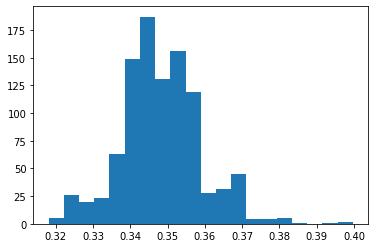

In [14]:
plt.hist(medians, 20)